## MÁQUINAS DE SOPORTE VECTORIAL

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVR # "Support vector regression"
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.api import abline_plot
from scipy import stats
from statsmodels import graphics
from sklearn import cross_validation 
from sklearn import grid_search

from sklearn.model_selection import train_test_split, cross_val_predict, cross_validate, RepeatedKFold, ShuffleSplit, learning_curve
from sklearn.metrics import r2_score, median_absolute_error,mean_squared_error

from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse
pd.set_option("display.max_rows", 10)

C:\Users\andrea\A\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\andrea\A\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#Importando conjunto de datos

cacao=pd.read_excel("TODAS LAS VARIABLES Y TOTAL.xlsx")

In [3]:
#Eliminar valores faltantes del conjunto de datos

cacao=cacao.dropna()

In [4]:
#Definir variables exógenas

x=cacao[[   "Diametro tronco (cm)",
            "P", "Mg",
            "%A", "%Hum/Grav",
            "Radiacion", "Temperatura", "Humedad", "Lluvias acumuladas (mms)" ]]

In [5]:
#Definir variable endógena

y=cacao["Rendimiento"]

### Histograma variable respuesta

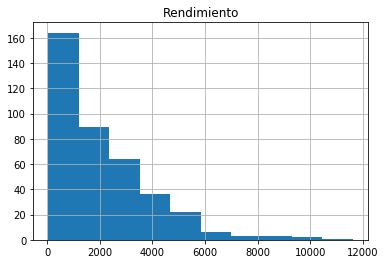

In [6]:
Respuesta=["Rendimiento"]
cacao.hist(Respuesta);

In [7]:
#Dividir el conjunto de datos entre entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 
   
# Normalización de los atributos
scaler= preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#### Búsqueda de parámetros

In [8]:
#Búsqueda de los mejores parámetros para el modelo SVM con kernel lineal

svr = GridSearchCV(SVR(kernel='linear', gamma=1, epsilon=0.1), cv=5,
                   param_grid = {'C':[1e1, 1e2, 1e3, 1e4],
                             "gamma":np.logspace(-2,2,5),
                             "epsilon": np.logspace(0,1,5)})
svr.fit(X_train_scaled, y_train);

In [9]:
print("Los mejores parámetros para el modelo SVM con kernel lineal son:")
svr.best_params_

Los mejores parámetros para el modelo SVM con kernel lineal son:


{'C': 10000.0, 'epsilon': 1.0, 'gamma': 0.01}

In [10]:
#Búsqueda de los mejores parámetros para el modelo SVM con kernel rbf

svr = GridSearchCV(SVR(kernel='rbf', gamma=1, epsilon=0.1), cv=5,
                   param_grid = {'C':[1e1, 1e2, 1e3, 1e4],
                             "gamma":np.logspace(-2,2,5),
                             "epsilon": np.logspace(0,1,5)})
svr.fit(X_train_scaled, y_train);

In [11]:
print("Los mejores parámetros para el modelo SVM con kernel rbf son:")
svr.best_params_

Los mejores parámetros para el modelo SVM con kernel rbf son:


{'C': 10000.0, 'epsilon': 1.0, 'gamma': 0.01}

#### Predicción modelo SVM

In [12]:
#Modelo SVM con kernel lineal

svr_lin = SVR(kernel='linear', C=1e4, epsilon=1e1, gamma=0.01).fit(X_train_scaled, y_train)
y_lin = svr_lin.predict(X_train_scaled)
print(y_lin)

[ 792.58444102 1175.59776462  476.64153008  465.31110665 1918.41507595
 1407.57687095 2329.21726241 2470.46262447 1313.40285704 2092.54033054
 1949.92976966 2287.57909043 2241.8513365  1635.49552337 1957.71521221
 1793.22032321  876.04760952 1899.15434476  269.49367288  399.24580009
  415.29640941  579.36542976 2460.98995536 1437.8189359  1343.37443365
 2162.38433769 2842.83676082  407.49456671 1120.17596713  462.59790535
  786.32329316 2351.90627723 2216.36988446 1116.8067494  2936.0879914
 1353.49791191  759.13225421 2265.88691125 1540.66758508  593.55688539
  950.53642884 1137.92663428 1435.61763569 1130.99588883   39.7121512
 2232.2209709  1213.23515484 1985.24111017 1777.29446338 2210.60044989
 1514.00400517 1582.39916933 2288.62597964 1261.38698282 3019.61162516
 1486.74943776 2486.73139556 2239.55201195 2788.48285088  770.92660822
 1601.65990052  497.28757581 1651.38843621 1412.91663486 1690.49642353
 1419.33687859 1870.26324797 1262.96369053 1760.53257962 1292.01248381
 1282.51

In [13]:
print('Coeficientes: \n',svr_lin.coef_)

Coeficientes: 
 [[  502.09608563  1949.81204821  1009.70866727 -1330.99002137
   1056.58241061   698.90374679  -281.03554591 -1698.00205152
   1597.48227769]]


In [14]:
#R^2 predicción GLM con kernel lineal

r2_score(y_train,y_lin)

0.15991576255396023

In [15]:
#Modelo SVM con kernel rbf

svr_rbf = SVR(kernel='rbf', C=1e4, epsilon=1e1, gamma=0.01)
y_rbf = svr_lin.fit(X_train_scaled, y_train).predict(X_train_scaled)
print(y_rbf)

[ 792.58444102 1175.59776462  476.64153008  465.31110665 1918.41507595
 1407.57687095 2329.21726241 2470.46262447 1313.40285704 2092.54033054
 1949.92976966 2287.57909043 2241.8513365  1635.49552337 1957.71521221
 1793.22032321  876.04760952 1899.15434476  269.49367288  399.24580009
  415.29640941  579.36542976 2460.98995536 1437.8189359  1343.37443365
 2162.38433769 2842.83676082  407.49456671 1120.17596713  462.59790535
  786.32329316 2351.90627723 2216.36988446 1116.8067494  2936.0879914
 1353.49791191  759.13225421 2265.88691125 1540.66758508  593.55688539
  950.53642884 1137.92663428 1435.61763569 1130.99588883   39.7121512
 2232.2209709  1213.23515484 1985.24111017 1777.29446338 2210.60044989
 1514.00400517 1582.39916933 2288.62597964 1261.38698282 3019.61162516
 1486.74943776 2486.73139556 2239.55201195 2788.48285088  770.92660822
 1601.65990052  497.28757581 1651.38843621 1412.91663486 1690.49642353
 1419.33687859 1870.26324797 1262.96369053 1760.53257962 1292.01248381
 1282.51

In [16]:
#R^2 predicción GLM con kernel rbf

r2_score(y_train,y_lin)

0.15991576255396023

In [17]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1e4,1e6, 1e3]} 
svr = svm.SVR () 
reg = grid_search.GridSearchCV(svr, parameters) 
print(reg.fit(X_train_scaled, y_train)) 

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [10000.0, 1000000.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


In [18]:
reg.best_params_

{'C': 10000.0, 'kernel': 'linear'}

### Cross Validation

In [22]:
rkf=RepeatedKFold(n_splits=10,n_repeats=10) #la función RepeatkFolds permite crear una particion de datos y repetirla
R_2=[]
RMSE=[]
MAE=[]
for train_index, test_index in rkf.split(x):
     
    x2_train, x2_test = x.iloc[train_index], x.iloc[test_index]
    y2_train, y2_test = y.iloc[train_index], y.iloc[test_index] # Values toma la transformación de box-cox
    
    #Escalando particiòn de datos
    scaler2= preprocessing.StandardScaler().fit(x2_train)
    X2_train_scaled=scaler.transform(x2_train)
    X2_test_scaled=scaler.transform(x2_test)
 
       
    # Ajuste de los modelos
    svr_lin = SVR(kernel='linear', C=1e4, epsilon=1e1, gamma=0.01).fit(X2_train_scaled, y2_train)
    y_lin = svr_lin.predict(X2_test_scaled)
    
    R_2.append(r2_score(y2_test,y_lin))
    RMSE.append(np.linalg.norm((y2_test-y_lin),2)/np.sqrt(len(y2_test)))
    MAE.append(median_absolute_error(y2_test,y_lin))
 
    
print("R^2: %.4f" % np.mean(R_2))
print("RMSE: %.4f" % np.mean(RMSE))
print("MAE: %.4f" % np.mean(MAE))

R^2: 0.0880
RMSE: 1731.0386
MAE: 926.4207


### Hold Out Validation

In [23]:
R_2=[]
RMSE=[]
MAE=[]
pred=[0]
obs=[0]

for i in range(20):
    x3_train,x3_test,y3_train,y3_test=train_test_split(x,y,test_size=0.2, random_state=12) #Hacer partición de datos en entrenamiento y prueba

    #Escalando particiòn de datos
    scaler3= preprocessing.StandardScaler().fit(x3_train)
    X3_train_scaled=scaler.transform(x3_train)
    X3_test_scaled=scaler.transform(x3_test)
    
    # Ajuste de los modelos
    svr_lin = SVR(kernel='linear', C=1e4, epsilon=1e1, gamma=0.01).fit(X3_train_scaled, y3_train)
    y_lin = svr_lin.predict(X3_test_scaled)
    
    r_2=r2_score(y3_test, y_lin)
    R_2.append(r_2)
    RMSE.append(np.linalg.norm((y3_test-y_lin,2)/np.sqrt(len(y3_test))))
    MAE.append(median_absolute_error(y3_test,y_lin))
    
    if r_2 >= max(R_2):
        pred[0] = y_lin
        obs[0] = y3_test
    
print("R^2: %.4f" % np.mean(R_2))
print("RMSE: %.4f" % np.mean(RMSE))
print("MAE: %.4f" % np.mean(MAE))

R^2: 0.1583
RMSE: 143.5137
MAE: 874.1280


In [26]:
RMSE

[154    246.026305
 373     28.316072
 89      13.301372
 1       24.712790
 369     75.653937
           ...    
 412     90.382936
 78      38.835184
 407    143.787437
 44      72.495156
 322    110.641352
 Name: Rendimiento, Length: 78, dtype: float64, 154    246.026305
 373     28.316072
 89      13.301372
 1       24.712790
 369     75.653937
           ...    
 412     90.382936
 78      38.835184
 407    143.787437
 44      72.495156
 322    110.641352
 Name: Rendimiento, Length: 78, dtype: float64, 154    246.026305
 373     28.316072
 89      13.301372
 1       24.712790
 369     75.653937
           ...    
 412     90.382936
 78      38.835184
 407    143.787437
 44      72.495156
 322    110.641352
 Name: Rendimiento, Length: 78, dtype: float64, 154    246.026305
 373     28.316072
 89      13.301372
 1       24.712790
 369     75.653937
           ...    
 412     90.382936
 78      38.835184
 407    143.787437
 44      72.495156
 322    110.641352
 Name: Rendimiento, Len

In [30]:
datos = np.asarray(RMSE)
np.savetxt("RMSE_SVM.csv",   # Archivo de salida
           datos.T,        # Trasponemos los datos
           fmt="%d",       # Usando números enteros
           delimiter=",")  # Para que sea un archivo CSV